## Advanced model: light gradient boosting

In order to achieve a better prediction result and lower metric(here it is RMSE), we applied a state-of-art ensemble machine learning model names Light Gradient Boosting. And we achieved a significant improvement from the baseline model.

As usual, I need to import necessary packages.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['__output__.json', 'finaltrain.csv', '__results___files', 'custom.css', 'finaltest.csv', '__results__.html']


I read the processed training set. I need to take aside the 'fare_amount' since it is our prediction target. Besides, I need to get rid of the features I will not use in this model.

In [2]:
import lightgbm as lgb
train = pd.read_csv('../input/finaltrain.csv',index_col=0)
train.head()

/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday,direct_lat_diff,direct_lon_diff,Distance,fare-bin
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,0.009041,0.002701,1.030764,"(0, 5]"
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,0.070701,0.036780,8.450134,"(15, 20]"
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,0.010708,0.008504,1.389525,"(05, 10]"
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,0.024949,0.004437,2.799270,"(05, 10]"
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,0.015754,0.011440,1.999157,"(05, 10]"


In [3]:
y = train['fare_amount']
train.drop(['pickup_datetime','fare_amount','direct_lat_diff','direct_lon_diff','fare-bin'], inplace = True, axis = 1)
x = train
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday,Distance
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,1.030764
1,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,8.450134
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,1.389525
3,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,2.799270
4,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,1.999157


Light Gradient Boosting is an ensemble method. Traitionally, people only built one single weak model to fit the data. And the generalizability of one single model is always weak. The variance of model is usually high and it is easy to overfit the data. An ensemble model collects a group of weak models together and take the average of the output of all the models. Therefore the model is more robust. Even one model is wrong or overfitting, the influence on the whole model will be diluted. 

Light Gradient Boosting is based on decision tree algorithms. It splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise. The leaf-wise algorithm will reduce more loss than the other algorithms. Thus, Light Gradient Boosting has faster training speed and better accuracy. 

Here we also used 20% of training data as a validation set to further prevent overfitting. 

In [5]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x,y ,test_size = 0.2, random_state = 42)

train_data = lgb.Dataset(x, label=y)
test_data = lgb.Dataset(x_test, label = y_test)

In [6]:

params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': 4,
#       'num_leaves': 45,
#        'feature_fraction': 0.9,
#        'lambda_l1':5,
#        'lambda_l2':3,
        'learning_rate': 0.1,
#        'max_depth': 8.99,
        'subsample': 0.8,
#        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
 #      'min_split_gain': 0.1,
 #       'min_child_weight': 37.0617,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,
        'num_rounds':50000
    }

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 500 rounds.
[10]	valid_0's rmse: 5.50534
[20]	valid_0's rmse: 4.20102
[30]	valid_0's rmse: 3.82492
[40]	valid_0's rmse: 3.68985
[50]	valid_0's rmse: 3.63624
[60]	valid_0's rmse: 3.59699
[70]	valid_0's rmse: 3.57143
[80]	valid_0's rmse: 3.54217
[90]	valid_0's rmse: 3.52322
[100]	valid_0's rmse: 3.50491
[110]	valid_0's rmse: 3.48877
[120]	valid_0's rmse: 3.47932
[130]	valid_0's rmse: 3.46416
[140]	valid_0's rmse: 3.44968
[150]	valid_0's rmse: 3.43803
[160]	valid_0's rmse: 3.42983
[170]	valid_0's rmse: 3.42325
[180]	valid_0's rmse: 3.41698
[190]	valid_0's rmse: 3.41088
[200]	valid_0's rmse: 3.4046
[210]	valid_0's rmse: 3.39675
[220]	valid_0's rmse: 3.39022
[230]	valid_0's rmse: 3.38733
[240]	valid_0's rmse: 3.38318
[250]	valid_0's rmse: 3.38045
[260]	valid_0's rmse: 3.37617
[270]	valid_0's rmse: 3.37183
[280]	valid_0's rmse: 3.36911
[290]	valid_0's rmse: 3.3667
[300]	valid_0's rmse: 3.36205
[310]	valid_0's rmse: 3.35745
[320]	valid_0's rm

[2680]	valid_0's rmse: 3.21513
[2690]	valid_0's rmse: 3.21518
[2700]	valid_0's rmse: 3.21523
[2710]	valid_0's rmse: 3.21521
[2720]	valid_0's rmse: 3.21517
[2730]	valid_0's rmse: 3.21497
[2740]	valid_0's rmse: 3.21474
[2750]	valid_0's rmse: 3.21476
[2760]	valid_0's rmse: 3.21469
[2770]	valid_0's rmse: 3.21485
[2780]	valid_0's rmse: 3.21484
[2790]	valid_0's rmse: 3.21478
[2800]	valid_0's rmse: 3.21471
[2810]	valid_0's rmse: 3.21479
[2820]	valid_0's rmse: 3.21475
[2830]	valid_0's rmse: 3.21467
[2840]	valid_0's rmse: 3.2147
[2850]	valid_0's rmse: 3.21471
[2860]	valid_0's rmse: 3.21458
[2870]	valid_0's rmse: 3.21458
[2880]	valid_0's rmse: 3.21448
[2890]	valid_0's rmse: 3.21449
[2900]	valid_0's rmse: 3.21442
[2910]	valid_0's rmse: 3.21444
[2920]	valid_0's rmse: 3.21429
[2930]	valid_0's rmse: 3.21439
[2940]	valid_0's rmse: 3.21393
[2950]	valid_0's rmse: 3.21395
[2960]	valid_0's rmse: 3.21396
[2970]	valid_0's rmse: 3.21391
[2980]	valid_0's rmse: 3.21353
[2990]	valid_0's rmse: 3.21353
[3000]	va

[5330]	valid_0's rmse: 3.2031
[5340]	valid_0's rmse: 3.20302
[5350]	valid_0's rmse: 3.20297
[5360]	valid_0's rmse: 3.20294
[5370]	valid_0's rmse: 3.20295
[5380]	valid_0's rmse: 3.20282
[5390]	valid_0's rmse: 3.20271
[5400]	valid_0's rmse: 3.20267
[5410]	valid_0's rmse: 3.20265
[5420]	valid_0's rmse: 3.2027
[5430]	valid_0's rmse: 3.20265
[5440]	valid_0's rmse: 3.2027
[5450]	valid_0's rmse: 3.20269
[5460]	valid_0's rmse: 3.20276
[5470]	valid_0's rmse: 3.20274
[5480]	valid_0's rmse: 3.20269
[5490]	valid_0's rmse: 3.2027
[5500]	valid_0's rmse: 3.20274
[5510]	valid_0's rmse: 3.20273
[5520]	valid_0's rmse: 3.20274
[5530]	valid_0's rmse: 3.20271
[5540]	valid_0's rmse: 3.20275
[5550]	valid_0's rmse: 3.20275
[5560]	valid_0's rmse: 3.20278
[5570]	valid_0's rmse: 3.20282
[5580]	valid_0's rmse: 3.20255
[5590]	valid_0's rmse: 3.20255
[5600]	valid_0's rmse: 3.20261
[5610]	valid_0's rmse: 3.20263
[5620]	valid_0's rmse: 3.20267
[5630]	valid_0's rmse: 3.20271
[5640]	valid_0's rmse: 3.2026
[5650]	valid_

[7990]	valid_0's rmse: 3.20061
[8000]	valid_0's rmse: 3.20057
[8010]	valid_0's rmse: 3.20058
[8020]	valid_0's rmse: 3.20057
[8030]	valid_0's rmse: 3.20054
[8040]	valid_0's rmse: 3.20051
[8050]	valid_0's rmse: 3.20052
[8060]	valid_0's rmse: 3.20041
[8070]	valid_0's rmse: 3.20013
[8080]	valid_0's rmse: 3.20008
[8090]	valid_0's rmse: 3.20004
[8100]	valid_0's rmse: 3.20004
[8110]	valid_0's rmse: 3.19999
[8120]	valid_0's rmse: 3.20004
[8130]	valid_0's rmse: 3.2001
[8140]	valid_0's rmse: 3.20006
[8150]	valid_0's rmse: 3.20003
[8160]	valid_0's rmse: 3.19988
[8170]	valid_0's rmse: 3.19988
[8180]	valid_0's rmse: 3.19981
[8190]	valid_0's rmse: 3.19982
[8200]	valid_0's rmse: 3.19982
[8210]	valid_0's rmse: 3.19976
[8220]	valid_0's rmse: 3.19975
[8230]	valid_0's rmse: 3.19967
[8240]	valid_0's rmse: 3.19973
[8250]	valid_0's rmse: 3.19966
[8260]	valid_0's rmse: 3.1996
[8270]	valid_0's rmse: 3.19928
[8280]	valid_0's rmse: 3.19918
[8290]	valid_0's rmse: 3.19916
[8300]	valid_0's rmse: 3.19916
[8310]	val

[10630]	valid_0's rmse: 3.19742
[10640]	valid_0's rmse: 3.19744
[10650]	valid_0's rmse: 3.19748
[10660]	valid_0's rmse: 3.19749
[10670]	valid_0's rmse: 3.19756
[10680]	valid_0's rmse: 3.19753
[10690]	valid_0's rmse: 3.19756
[10700]	valid_0's rmse: 3.19745
[10710]	valid_0's rmse: 3.19746
[10720]	valid_0's rmse: 3.19748
[10730]	valid_0's rmse: 3.19744
[10740]	valid_0's rmse: 3.19739
[10750]	valid_0's rmse: 3.19743
[10760]	valid_0's rmse: 3.19735
[10770]	valid_0's rmse: 3.19744
[10780]	valid_0's rmse: 3.1974
[10790]	valid_0's rmse: 3.1974
[10800]	valid_0's rmse: 3.19735
[10810]	valid_0's rmse: 3.19734
[10820]	valid_0's rmse: 3.19737
[10830]	valid_0's rmse: 3.19734
[10840]	valid_0's rmse: 3.19734
[10850]	valid_0's rmse: 3.19731
[10860]	valid_0's rmse: 3.19728
[10870]	valid_0's rmse: 3.19726
[10880]	valid_0's rmse: 3.19728
[10890]	valid_0's rmse: 3.19727
[10900]	valid_0's rmse: 3.19729
[10910]	valid_0's rmse: 3.19723
[10920]	valid_0's rmse: 3.19727
[10930]	valid_0's rmse: 3.19734
[10940]	va

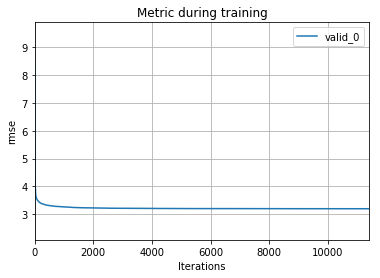

In [7]:
from lightgbm import LGBMClassifier
evals_result_dict={}
model = lgb.train(#parameters,
                    params,
                       train_data,
                       valid_sets=test_data,
                    num_boost_round=100000, 
                    early_stopping_rounds=500,
                    verbose_eval=10,
                    evals_result=evals_result_dict
                 )
lgb.plot_metric(evals_result_dict)

In the figure above, I plotted the change of RMSE in validation set as a function of iteration steps. Clearly it is firstly dramatically decreasing to a quite low level. With the optimization process going on, it is slowly decreasing. Finally, it the RMSE in validation set reached  
The parameters are from other kernels. They are from bayesian optimization of the model. Definitely we can do the bayesian optimization but due to our limited computational resource, it will take very long time. In a word, bayesian is just a fancy grid search technique. And here obviously we will have improvement space if we can do a through grid search for the hyperparameters.

Finally, we used this model to predict the taxi fare amount on the test set. A RMSE of 3.137 was achieved. It is surely not perfect since this number is still large especially when we
need to predict a taxi ride fare with a 2.5 base. But we can clearly see the power of Light Gradient Boosting and its outstanding training speed. 

In [11]:
submission = pd.read_csv('../input/finaltest.csv')
submission.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday,Distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,1,2.323260
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,1,2.425353
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5,0.618628
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,5,1.961033
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,5,5.387301


In [12]:
KEY = submission['key']
submission.drop(['key', 'pickup_datetime'], inplace=True, axis = 1)
X = submission.values
Y = model.predict(X)

In [14]:
output = pd.DataFrame({'key':KEY, 'fare_amount':Y})
output.to_csv("submission_LGBM.csv", index = False)